In [2]:
import yfinance as yf

In [29]:

date = '2023-01-01'
stock_no = '0050.TW'

stock = yf.Ticker(stock_no)
stock_data = stock.history(start=date)

stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-01-03 00:00:00+08:00,109.599998,110.900002,108.449997,110.750000,14810634,0.0,0.0,0.0
2023-01-04 00:00:00+08:00,110.300003,110.800003,110.099998,110.500000,13754853,0.0,0.0,0.0
2023-01-05 00:00:00+08:00,111.250000,111.699997,110.949997,111.300003,12070904,0.0,0.0,0.0
2023-01-06 00:00:00+08:00,111.199997,112.199997,111.150002,111.800003,11586780,0.0,0.0,0.0
2023-01-09 00:00:00+08:00,114.000000,115.800003,113.900002,115.800003,14998076,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-04-13 00:00:00+08:00,120.050003,120.150002,119.500000,119.500000,6550004,0.0,0.0,0.0
2023-04-14 00:00:00+08:00,120.000000,120.900002,119.849998,120.650002,3090804,0.0,0.0,0.0
2023-04-17 00:00:00+08:00,120.349998,120.500000,119.800003,120.349998,5689168,0.0,0.0,0.0


In [31]:
stock_data.to_csv(r"C:\Users\lenovo\Downloads\stock_0050.csv")

In [23]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [39]:
dataframe = read_csv(r"C:\Users\lenovo\Downloads\stock_0050.csv", usecols=[1], engine='python', skipfooter=3)
dataframe

,Open
0,109.599998
1,110.300003
2,111.250000
3,111.199997
4,114.000000
...,...
56,121.250000
57,121.000000
58,120.849998
59,120.050003


In [35]:
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset[:10]

array([[109.6 ],
       [110.3 ],
       [111.25],
       [111.2 ],
       [114.  ],
       [115.95],
       [116.65],
       [116.5 ],
       [118.5 ],
       [118.1 ]], dtype=float32)

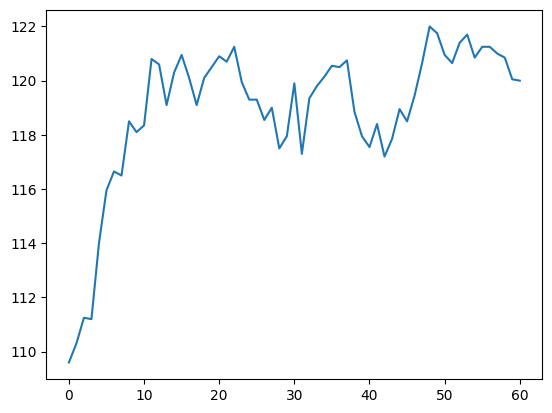

In [36]:
plt.plot(dataset)
plt.show()

In [37]:
# 產生 (X, Y) 資料集, Y 是下一期的乘客數
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [40]:
# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [41]:
# 產生 (X, Y) 資料集, Y 是下一期的乘客數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [42]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [43]:
# 建立及訓練 LSTM 模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
38/38 - 1s - loss: 0.5459 - 1s/epoch - 39ms/step
Epoch 2/100
38/38 - 0s - loss: 0.4643 - 66ms/epoch - 2ms/step
Epoch 3/100
38/38 - 0s - loss: 0.3874 - 63ms/epoch - 2ms/step
Epoch 4/100
38/38 - 0s - loss: 0.3097 - 60ms/epoch - 2ms/step
Epoch 5/100
38/38 - 0s - loss: 0.2339 - 59ms/epoch - 2ms/step
Epoch 6/100
38/38 - 0s - loss: 0.1624 - 62ms/epoch - 2ms/step
Epoch 7/100
38/38 - 0s - loss: 0.1033 - 60ms/epoch - 2ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0610 - 60ms/epoch - 2ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0372 - 62ms/epoch - 2ms/step
Epoch 10/100
38/38 - 0s - loss: 0.0272 - 63ms/epoch - 2ms/step
Epoch 11/100
38/38 - 0s - loss: 0.0232 - 60ms/epoch - 2ms/step
Epoch 12/100
38/38 - 0s - loss: 0.0219 - 62ms/epoch - 2ms/step
Epoch 13/100
38/38 - 0s - loss: 0.0213 - 62ms/epoch - 2ms/step
Epoch 14/100
38/38 - 0s - loss: 0.0209 - 70ms/epoch - 2ms/step
Epoch 15/100
38/38 - 0s - loss: 0.0205 - 70ms/epoch - 2ms/step
Epoch 16/100
38/38 - 0s - loss: 0.0203 - 63ms/epoch - 2ms/step
Ep

In [49]:
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 23ms/step


In [45]:
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [46]:
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.05 RMSE
Test Score: 0.75 RMSE


In [47]:
# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [48]:
# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

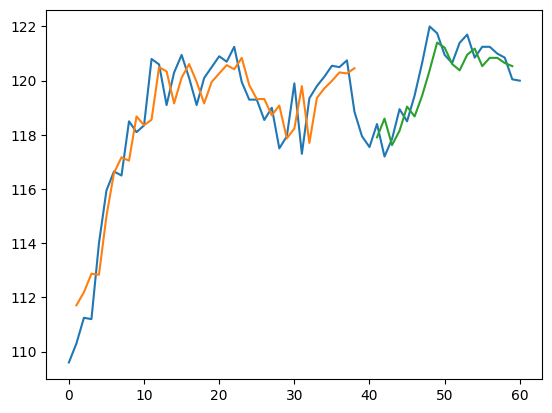

In [50]:
# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
import yfinance as yf
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [20]:
date = '2023-01-01'
stock_no = '2303.TW'

stock = yf.Ticker(stock_no)
stock_data = stock.history(start=date)
stock_data.to_csv(r"C:\Users\lenovo\Downloads\stock_2303.csv")
stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00+08:00,40.450001,41.500000,40.250000,41.400002,34737355,0.0,0.0
2023-01-04 00:00:00+08:00,41.250000,41.599998,41.049999,41.049999,23573244,0.0,0.0
2023-01-05 00:00:00+08:00,41.799999,41.799999,41.099998,41.250000,29326997,0.0,0.0
2023-01-06 00:00:00+08:00,41.299999,42.400002,41.250000,42.400002,54893830,0.0,0.0
2023-01-09 00:00:00+08:00,43.599998,44.500000,43.349998,44.500000,119293217,0.0,0.0


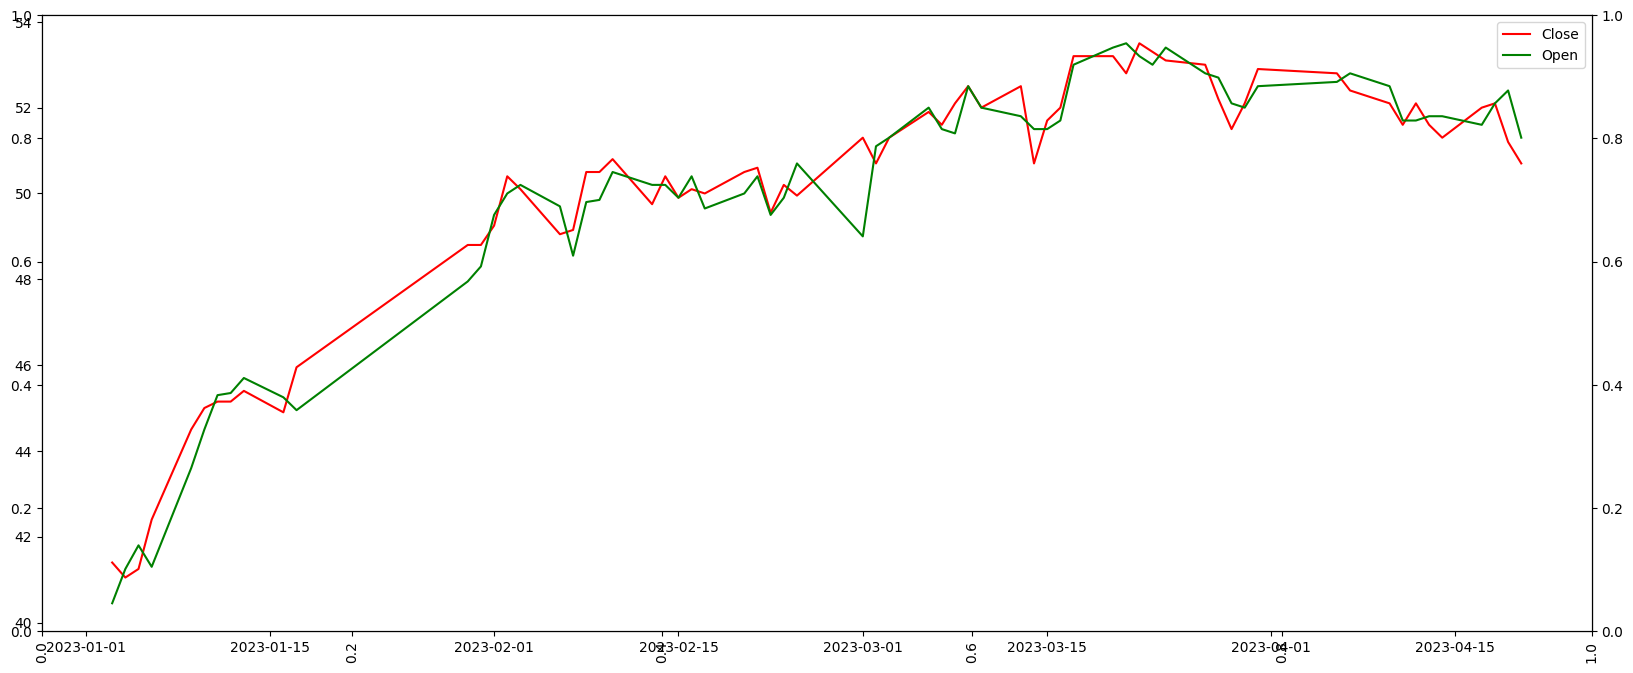

In [21]:
fig=plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)  
ax1 = fig.add_subplot(111)
ax1.plot(stock_data.Close,color='red',label='Close')
ax1.plot(stock_data.Open,color='green',label='Open')
plt.legend()
# twin 為共享x軸
ax2= ax1.twinx()
plt.bar(stock_data.Date,stock_data.Volume.astype('int')//1000)
#ax3 = ax1.twinx()
#plt.savefig('2330_year.png')

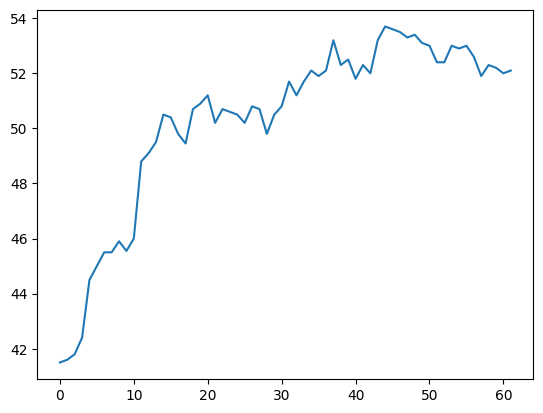

In [9]:
dataframe = read_csv(r"C:\Users\lenovo\Downloads\stock_2303.csv", usecols=[2], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

In [10]:

# 產生 (X, Y) 資料集, Y 是下一期的乘客數
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的乘客數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# 建立及訓練 LSTM 模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
39/39 - 4s - loss: 0.6171 - 4s/epoch - 115ms/step
Epoch 2/100
39/39 - 0s - loss: 0.5168 - 161ms/epoch - 4ms/step
Epoch 3/100
39/39 - 0s - loss: 0.4332 - 148ms/epoch - 4ms/step
Epoch 4/100
39/39 - 0s - loss: 0.3612 - 199ms/epoch - 5ms/step
Epoch 5/100
39/39 - 0s - loss: 0.2974 - 278ms/epoch - 7ms/step
Epoch 6/100
39/39 - 0s - loss: 0.2435 - 278ms/epoch - 7ms/step
Epoch 7/100
39/39 - 0s - loss: 0.1957 - 239ms/epoch - 6ms/step
Epoch 8/100
39/39 - 0s - loss: 0.1575 - 248ms/epoch - 6ms/step
Epoch 9/100
39/39 - 0s - loss: 0.1262 - 280ms/epoch - 7ms/step
Epoch 10/100
39/39 - 0s - loss: 0.1025 - 243ms/epoch - 6ms/step
Epoch 11/100
39/39 - 0s - loss: 0.0843 - 281ms/epoch - 7ms/step
Epoch 12/100
39/39 - 0s - loss: 0.0725 - 257ms/epoch - 7ms/step
Epoch 13/100
39/39 - 0s - loss: 0.0634 - 254ms/epoch - 7ms/step
Epoch 14/100
39/39 - 0s - loss: 0.0575 - 244ms/epoch - 6ms/step
Epoch 15/100
39/39 - 0s - loss: 0.0539 - 241ms/epoch - 6ms/step
Epoch 16/100
39/39 - 0s - loss: 0.0508 - 254ms/epo

In [13]:
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 52ms/step


In [14]:
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.70 RMSE
Test Score: 0.57 RMSE


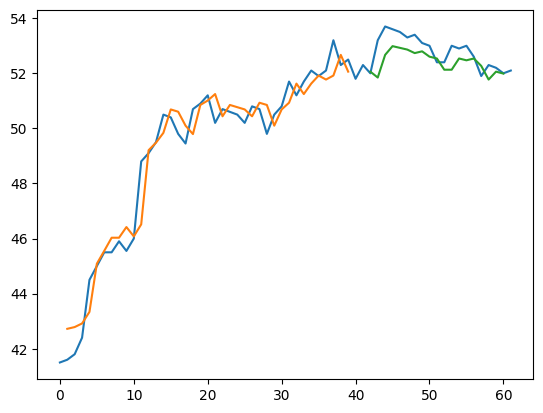

In [15]:
# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()